
# **Assignment 1**


## Task 1. Correlation
We will use the data example from the textbook "Statistical Analysis with The General Linear Model" by Miller and Haden (2013), Chapter 11.

As in Miller and Haden, we have five columns:

-Participant (Participant),

-Reading Ability (Abil),

-Intelligence (IQ),

-Number of minutes spent reading at home per week (Home),

-Number of minutes spent watching TV per week (TV).


For the task we will focus on the relationship between Reading Ability and IQ, but for further practice you can look at other relationships on your own.

**Question 1**:

a. Check whether the data is interval, ratio, or ordinal.

b. Check whether there is a data point for each participant on both variables.

c. Check whether the data is normally distributed in both variables.

d. Create a scatter plot with Reading Ability being the x-axis and IQ, being the y-axis.

e. Draw a correlation line on the scatter plot.


**Instructions:**

1. Load the necessary libraries and explain why you need them ("#used for ...").

2. Read the MillerHadenData.csv file into a DataFrame and name it "df_mh".

In [77]:
import pandas as pd # used for data wrangling
import seaborn as sns # used for visualization
import matplotlib  # used for creating charts and visualizations
from matplotlib import pyplot as plt # used for creating various types of plots and visualizations to help understand the data
import pylab # used for creating plots and visualizations.
!pip install pingouin # load pingouin
import pingouin as pg # used for conducting statistical tests or analyses.

df_mh = pd.read_csv('data for A1/MillerHadenData.csv') # read data of MillerHadenData.csv



In [78]:
# Q1a (code):

# Display first 5 rows of the dataframe
print(df_mh.head())

# Check data types and information


   Participant  Abil   IQ  Home   TV
0            1    61  107   144  487
1            2    56  109   123  608
2            3    45   81   108  640
3            4    66  100   155  493
4            5    49   92   103  636


In [79]:
# Q1b (code):
# Check for missing values
missing_data = df_mh[['Abil', 'IQ']].isnull().sum()

# Check whether there is a data point for each participant on both variables
if all(missing_data == 0):
    print("Each participant has data points for both variables.")
else:
    print("Some participants are missing data points for at least one variable.")
    print("Missing data statistics:")
    print(missing_data)
# This part of the code checks if there are missing values for any participant in either the 'Abil' or 'IQ' 
# variable. If there are no missing values (all(missing_data == 0) is True), it prints a message indicating that
# each participant has data points for both variables. Otherwise, it prints a message indicating that some 
# participants are missing data points for at least one variable, along with the missing data statistics.

Each participant has data points for both variables.


In [80]:
# Q1c (code):
from scipy.stats import shapiro

# Check data distribution
shapiro_reading = shapiro(df_mh['Abil'])
shapiro_iq = shapiro(df_mh['IQ'])
# The shapiro function from the scipy.stats module is used to conduct the Shapiro-Wilk test. It returns
# the test statistic ('W') and the p-value for each variable.

print("Shapiro-Wilk test results:")
print(f"Abil: W={shapiro_reading[0]}, p-value={shapiro_reading[1]}")
print(f"IQ: W={shapiro_iq[0]}, p-value={shapiro_iq[1]}")

# These conditional statements interpret the results of the Shapiro-Wilk test. If the p-value is greater than 0.05,
# it is concluded that the variable is normally distributed; otherwise, it is considered not normally distributed.
# The printed messages convey whether 'Abil' and 'IQ' are normally distributed based on the significance level of
# 0.05.

if shapiro_reading[1] > 0.05:
    print("Abil is normally distributed.")
else:
    print("Abil is not normally distributed.")

if shapiro_iq[1] > 0.05:
    print("IQ is normally distributed.")
else:
    print("IQ is not normally distributed.")

Shapiro-Wilk test results:
Abil: W=0.9487950205802917, p-value=0.2354886382818222
IQ: W=0.9636043310165405, p-value=0.4908201992511749
Abil is normally distributed.
IQ is normally distributed.


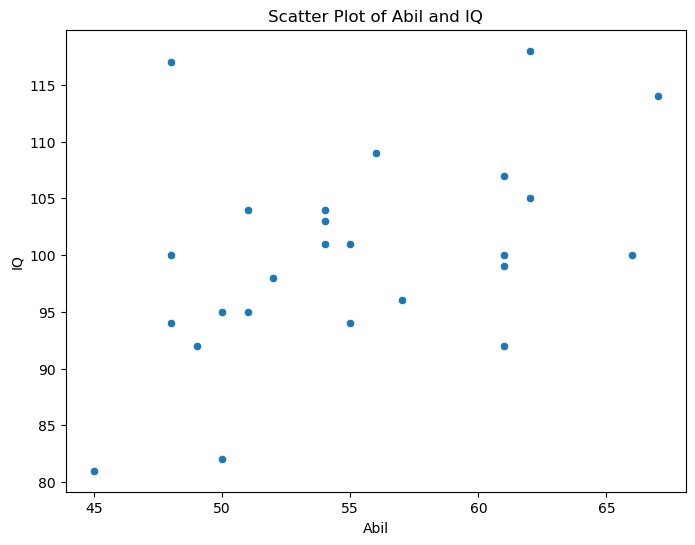

In [81]:
# Q1d (code):Create a scatter plot
# Scatter plot

plt.figure(figsize=(8, 6)) #This line initializes a new figure with a specified size (8 inches in width and 6 inches in height).
sns.scatterplot(x='Abil', y='IQ', data=df_mh) # create a scatter plot. It takes the 'Abil' variable as the x-axis, 'IQ' as the y-axis, and the data is provided from the DataFrame df_mh.
plt.title('Scatter Plot of Abil and IQ') # title ：Scatter Plot of Abil and IQ
plt.xlabel('Abil') # x-axes:Abil
plt.ylabel('IQ')  # y-axes:IQ
plt.show()




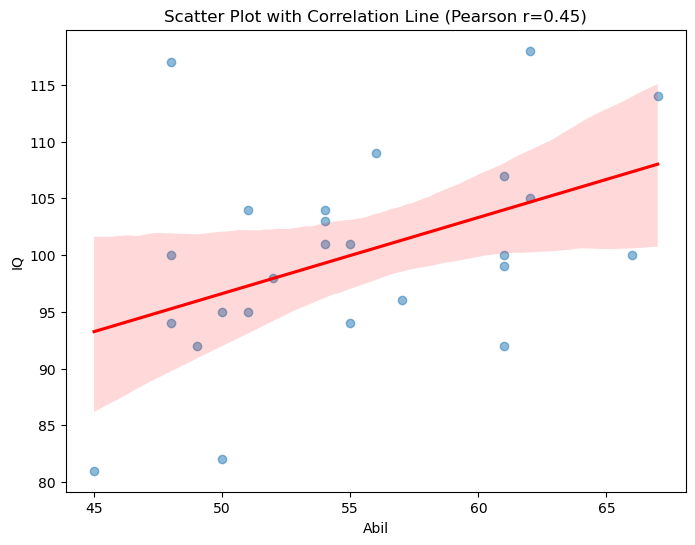

In [82]:
# Q1e (code):
from scipy.stats import pearsonr
# Correlation line: Using Pearson correlation coefficient(because normally distributed and linear correlation)
correlation_coefficient, _ = pearsonr(df_mh['Abil'], df_mh['IQ'])

plt.figure(figsize=(8, 6)) 
sns.regplot(x='Abil', y='IQ', data=df_mh, line_kws={'color': 'red'}, scatter_kws={'alpha': 0.5})
plt.title(f'Scatter Plot with Correlation Line (Pearson r={correlation_coefficient:.2f})')
plt.xlabel('Abil')
plt.ylabel('IQ')
plt.show()

**Question 2**:

a. Which correlation coefficient test can we use, Pearson or Spearman? Briefly explian why based on the results of Question 1.

b. Conduct a correlation coefficient test.

c. Interpret the result (direction and strength of the association between the two varibles)

In [83]:
# Q2a (answer with words):
#Since both 'Abil'and 'IQ' are normally distributed, we can use the Pearson correlation coefficient
#The Pearson correlation coefficient is appropriate when the variables are normally distributed 
# and there is a linear relationship between them as we can see in Q1D.

In [85]:
# Q2b (code):
#This line of code uses the pearsonr function
#to calculate the Pearson correlation coefficient and its associated p-value for the variables 'Abil' and 'IQ'.
correlation_coefficient, p_value = pearsonr(df_mh['Abil'], df_mh['IQ'])

#we print the computed Pearson correlation coefficient and p-value, rounding them to four decimal places.
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")
alpha = 0.05 # the significance level (alpha) to 0.05, which is a common threshold in hypothesis testing.
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between 'Abil' and 'IQ'.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between 'Abil' and 'IQ'.")
# This conditional statement compares the calculated p-value (presumably obtained from a statistical test) with 
# the chosen significance level. If the p-value is less than the significance level (alpha), it prints a message 
# indicating that the null hypothesis is rejected, suggesting a significant correlation between 'Abil' and 'IQ'. 
# If the p-value is greater than or equal to the significance level, it prints a message indicating a failure to
# reject the null hypothesis, suggesting no significant correlation between 'Abil' and 'IQ'.

Pearson Correlation Coefficient: 0.4512
P-value: 0.0236
Reject the null hypothesis. There is a significant correlation between 'Abil' and 'IQ'.


In [86]:
# Q2c (answer with words):

#This part of the code determines the direction of the relationship based on whether the Pearson 
#correlation coefficient is positive, negative, or close to zero.
if correlation_coefficient > 0:
    direction = "positive"
elif correlation_coefficient < 0:
    direction = "negative"
else:
    direction = "no"
#This part of the code categorizes the strength of the association as very weak, weak, moderate, 
#strong, or very strong based on the absolute value of the Pearson correlation coefficient.  
if 0.8 <= abs(correlation_coefficient) <= 1:
    strength = "very strong"
elif 0.6 <= abs(correlation_coefficient) < 0.8:
    strength = "strong"
elif 0.4 <= abs(correlation_coefficient) < 0.6:
    strength = "moderate"
elif 0.2 <= abs(correlation_coefficient) < 0.4:
    strength = "weak"
else:
    strength = "very weak"
#The final line of code prints the interpreted results based on the calculated Pearson correlation 
#coefficient and p-value, including the direction and strength of the association
print(f"The association between 'Abil' and 'IQ' is {direction} and has a {strength} strength.")

The association between 'Abil' and 'IQ' is positive and has a moderate strength.


## Task 2. Chi-square Test
We will continue to use the data example from Task 1.

We want to explore whether there are significant differences in the amount of time spent reading at home per week (Home) among people with different reading abilities (Reading Ability). Therefore, we will divide the reading ability of all participants into two groups. The first group is those with low reading ability (Reading Ability at or below the rounded average), and the second group is those with high reading ability (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Abil".


Similarly, the reading time is divided into two different scenarios: the first scenario is infrequent reading (Home at or below the rounded average), and the other is frequent reading (Reading Ability above the rounded average). We will store this grouping in a new column named "Rank_Home".


Then, construct a Contingency Matrix and perform a Chi-square test.

**Question 3**:

a. Please state the null hypothesis (H0) and alternative hypothesis (H1) for this Chi-square test.

b. Based on the task description, add new columns “Rank_Abil” and "Rank_Home" to the dataframe df_mh.

c. Construct a Contingency Matrix.

d. Perform a Chi-square test.

e. Interpret the results of the Chi-square test (answer in text).

In [87]:
# Q3a (answer in words):

# H0:There is no significant association between the reading ability ("Rank_Abil") and 
# the amount of time spent reading at home ("Rank_Home") among the participants.

# H1：There is a significant association between the reading ability ("Rank_Abil") and 
# the amount of time spent reading at home ("Rank_Home") among the participants.

In [88]:
# Q3b (code):
# Import necessary libraries
import pandas as pd  
from scipy.stats import chi2_contingency ##used for performing the chi-square test of independence on two categorical variables
import numpy as np

# Define the rounded average for Reading Ability and Home

# First, we calculate the average values for 'Abil' and 'Home'.
average_abil = df_mh['Abil'].mean()
average_home = df_mh['Home'].mean()

# Create the Rank_Abil column
# We add a new column "Rank_Abil" based on whether the 'Abil' is below or above the average.
df_mh['Rank_Abil'] = np.where(df_mh['Abil'] <= average_abil, 'Low', 'High')

# Create the Rank_Home column
#We add a new column "Rank_Home" based on whether the 'Home' is below or above the average.
df_mh['Rank_Home'] = np.where(df_mh['Home'] <= average_home, 'Infrequent', 'Frequent')

# Display the updated DataFrame
df_mh.head()

,Participant,Abil,IQ,Home,TV,Rank_Abil,Rank_Home
0,1,61,107,144,487,High,Frequent
1,2,56,109,123,608,High,Infrequent
2,3,45,81,108,640,Low,Infrequent
3,4,66,100,155,493,High,Frequent
4,5,49,92,103,636,Low,Infrequent


In [89]:
# Q3c (code):

# Construct the Contingency Matrix
contingency_table = pd.crosstab(df_mh['Rank_Abil'], df_mh['Rank_Home'])

# Display the Contingency Matrix
print("Contingency Matrix:")
print(contingency_table)

Contingency Matrix:
Rank_Home  Frequent  Infrequent
Rank_Abil                      
High              8           2
Low               3          12


In [22]:
# Q3d (code):

# Perform the Chi-square test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the Chi-square test results
print("\nChi-square Test Results:")
print(f"Chi2 Value: {chi2:.4f}")
print(f"P-value: {p:.4f}")



Chi-square Test Results:
Chi2 Value: 6.5003
P-value: 0.0108


In [23]:
# Q3e (answer in words):

# Interpret the results
alpha = 0.05  # significance level
print("\nInterpretation:")
if p < alpha:
    print("There is a significant association between 'Rank_Abil' and 'Rank_Home'.")
else:
    print("There is no significant association between 'Rank_Abil' and 'Rank_Home'.")
# If the p-value is less than the chosen significance level, it suggests rejecting the null hypothesis, 
# indicating a significant association between 'Rank_Abil' and 'Rank_Home'. 
# Conversely, if the p-value is greater than or equal to the significance level, the code suggests failing to reject 
# the null hypothesis, implying no significant association.


Interpretation:
There is a significant association between 'Rank_Abil' and 'Rank_Home'.


## Task 3. Two-sample t-test
As we discussed on Week 3, Two-sample designs are very useful when we want to know whether there is a difference between groups on a particular variable.

In this assignment, you will be guided to replicate the Experiment 4 (p. 887-888) from the paper below, focusing on understanding the data through descriptive statistics, visualizing distributions, testing assumptions (normality and variance homogeneity), and finally performing the independent t-test.

Schroeder, J. and Epley, N. (2015). The sound of intellect: Speech reveals a thoughtful mind, increasing a job candidate's appeal. Psychological Science, 26, 277--891.


As we explained during Week 3 lecture, there are different types of two-sample designs depending on whether or not the two groups are independent (e.g., different participants in different conditions) or not (e.g., same participants in different conditions). In this course we focus on independent samples, which typically means that the observations in the two groups are unrelated - usually meaning different people. But in real practice you will need to go through similar procedures to determine which is the proper statistical test to use.




### Background of data: Speech as indicator of intellect
To recap on Experiment 4, 39 professional recruiters from Fortune 500 companies evaluated job pitches of M.B.A. candidates (Masters in Business Administration) from the University of Chicago Booth School of Business. The methods and results appear on pages 887--889 of the article if you want to look at them specifically for more details.

###Step 1: Analyze the demographics of evaluators from the provided dataset

**Instructions:**

1. Load the necessary libraries (pandas, scipy, numpy, matplotlib.pyplot, seaborn) and explain why you need them ("#used for ...").

2. Read the evaluators.csv file into a DataFrame.

3. Calculate the mean and standard deviation of the age of the evaluators, handling missing values appropriately.

4. Count how many male and female evaluators were in the study.

**Question 4:**

a. What was the mean age of the evaluators?
What was the standard deviation of the age of the evaluators?

b. How many participants were female and how many participants were male?


In [90]:

import pandas as pd
from scipy import stats 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Load the data of evaluators.csv and show the first 5 rows 
df_evaluators = pd.read_csv('data for A1/evaluators.csv')
df_evaluators.head() 


,eval_id,condition,age,sex
0,1,listened,29.0,2.0
1,2,listened,27.0,2.0
2,3,listened,27.0,2.0
3,4,read,40.0,2.0
4,5,read,32.0,2.0


In [91]:
# Q4a (code):
# Calculate mean and standard deviation for age

# Calculate the mean age
mean_age = df_evaluators['age'].mean()

# Calculate the standard deviation of age
std_dev_age = df_evaluators['age'].std()

# Display the results
print(f"Mean Age: {mean_age:.2f}")
print(f"Standard Deviation of Age: {std_dev_age:.2f}")


Mean Age: 30.85
Standard Deviation of Age: 6.24


In [92]:
# Q4b (code)

# Step 1: Count male and female evaluators
gender_counts = df_evaluators['sex'].value_counts()

# Step 2: In the 'sex' column: 1 represents males and 2 represents females
gender_counts = df_evaluators['sex'].replace({1: 'number of Male evaluators', 2: 'number of Female evaluators'}).value_counts()

# Step 3: Display the result
print("Gender Distribution:")
print(gender_counts)



Gender Distribution:
number of Female evaluators    30
number of Male evaluators       4
Name: sex, dtype: int64


###Step 2: Calculate overall intellect ratings from evaluators and prepare a combined dataset for analysis

We are now going to calculate an overall intellect rating given by each evaluator. To break that down a bit, we are going to calculate how intellectual the evaluators (the raters) thought candidates were overall, depending on whether the evaluators read or listened to the candidates' resume pitches. This is calculated by averaging the ratings of competent, thoughtful and intelligent for each evaluator held within ratings.csv.

Note: We are not looking at ratings to individual candidates; we are looking at overall ratings for each evaluator. This is a bit confusing but makes sense if you stop to think about it a little. You can think about it in terms of "do raters rate differently depending on whether they read or listen to a resume pitch".
We will then combine the overall intellect rating with the overall impression ratings and overall hire ratings for each evaluator, all ready found in ratings.csv. In the end we will have a new new dataframe named "ratings2" - which has the below structure:

**eval_id** shows the evaluator ID. Each evaluator has a different ID. So all the 1's are the same evaluator.

**Category** shows the scale that they were rating on - intellect, hire, impression

**Rating** shows the overall rating given by that evaluator on a given scale.

**condition** shows whether that evaluator listened to (e.g., evaluators 1, 2 and 3), or read (e.g., evaluator 4) the resume.


**Instructions:**

1. Load the ratings.csv file.

2. Filter and calculate the mean intellect rating for each evaluator.

3. Combine this with overall impression and hire ratings to create a new DataFrame named "rating2".

4. Merge this DataFrame with the evaluator demographics.

**Question 5**:

Print the head of "rating2".


In [93]:
# Load ratings data of ratings.csv and read the first 5 rows
df_ratings = pd.read_csv('data for A1/ratings.csv')
df_ratings.head()


,eval_id,Category,Rating
0,1,competent,6.0
1,1,thoughtful,6.0
2,1,intelligent,6.0
3,1,impression,7.0
4,1,hire,6.0


In [94]:
# Q5 (code):
# Filter the ratings DataFrame to include only 'thoughtful', 'competent', and 'intelligent' categories
filtered_ratings = df_ratings[df_ratings['Category'].isin(['thoughtful', 'competent', 'intelligent'])]

# Calculate the mean intellect rating for each evaluator. Group by 'eval_id' and calculate mean, then reset the index to convert groupby object back to DataFrame
intellect_mean = filtered_ratings.groupby('eval_id')['Rating'].mean().reset_index()

# Add a 'Category' column with the value 'intellect' for these rows
intellect_mean['Category'] = 'intellect' 

# Create a DataFrame for 'impression' and 'hire' ratings
other_ratings = df_ratings[df_ratings['Category'].isin(['impression', 'hire'])]

# Combine the DataFrames to create 'ratings2'. Concatenate the 'intellect_mean' DataFrame with the 'other_ratings' DataFrame
ratings2 = pd.concat([intellect_mean, other_ratings])

# Join 'ratings2' with the 'df_evaluators' DataFrame to add the 'condition' column
ratings2 = pd.merge(ratings2, df_evaluators[['eval_id', 'condition']], on='eval_id')

# Select only the necessary columns as per the structure required
ratings2 = ratings2[['eval_id', 'Category', 'Rating', 'condition']]

# Arrange by 'eval_id' and 'Category'
ratings2 = ratings2.sort_values(by=['eval_id', 'Category']).reset_index(drop=True)

# Display the first few rows of the final 'ratings2' DataFrame to verify
ratings2.head()


,eval_id,Category,Rating,condition
0,1,hire,6.000000,listened
1,1,impression,7.000000,listened
2,1,intellect,6.000000,listened
3,2,hire,4.000000,listened
4,2,impression,4.666667,listened


###Step 3: Perform descriptive and inferential statistical analyses, including testing assumptions and conducting independent t-tests.

We are going to run the t-tests for Intellect, Hire and Impression; each time comparing evaluators overall ratings for the listened group versus overall ratings for the read group to see if there was a significant difference between the two conditions: i.e., did the evaluators who listened to pitches give a significant higher or lower rating than evaluators that read pitches?

**Question 6**:

a. In terms of hypotheses, how can we phrase the hypothesis?

b. Which t-test should we choose, one-tail or two-tail? And explian why.

c. What are the independent variable and the dependent variable here?



In [95]:
# Q6a (answer in words):

# Null hypothesis: 
# There is no significant difference between overall ratings on the intellect, hire, and impression scales 
# between evaluators who listened to resume pitches and evaluators who read the resume pitches (μ1 = μ2).

# Alternative hypothesis: 
# There is a significant difference between overall ratings on the intellect, hire, and impression scales 
# between evaluators who listened to resume pitches and evaluators who read the resume pitches (μ1 ≠ μ2).

# we could phrase the null hypothesis for these tests as there is no significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H0:μ1=μ2). Alternatively, we could state it as there will be a significant difference between overall ratings on the {insert trait} scale between evaluators who listened to resume pitches and evaluators who read the resume pitches (H1:μ1≠μ2).

In [96]:
# Q6b (answer in words):
# Which t-test should we choose, one-tail or two-tail? Explian why.

# We should choose a two-tail t-test. 
# This is because we want to determine whether there is a significant difference in either direction 
# (higher or lower ratings) between the two conditions. A two-tail test is appropriate when we are interested in
# deviations in either direction from the null hypothesis.

In [97]:
# Q6c (answer in words):
# What are the independent variable and the dependent variable here?

# The independent variable is the condition in which evaluators were placed, either "listened" or "read." 
# The dependent variables are the overall ratings on the intellect, hire, and impression scales. 
# The ratings are dependent on the condition in which the evaluators were placed.


To clarify, we are going to run three between-subjects t-tests in total; one for intellect ratings; one for hire ratings; one for impression ratings.

**Instructions:**

1. Descriptive analysis of the ratings.

2. Test for normal distribution (Shapiro-Wilk test) and homogeneity of variances (Levene's test) for the intellect, impression, and hire ratings.

3. Conduct independent t-tests comparing intellect, impression, and hire ratings between conditions (listened vs. read).

Hints: three T-tests need to be performed.

**Question 7**:

a: Print the test results.

b: Interpret the results of the above descriptive statistics, Shapiro-Wilk test, Levene's test, and independent t-tests. Explian why we use these tests and how we made our decisions based on the test result.

In [98]:
##Q7a (code):
from scipy.stats import shapiro, levene, ttest_ind # used for statistical analysis in Python

# Descriptive analysis of the ratings
ratings_desc = ratings2.groupby(['Category', 'condition'])['Rating'].describe()

# Test for normal distribution (Shapiro-Wilk test)
shapiro_results = ratings2.groupby(['Category', 'condition'])['Rating'].apply(lambda x: shapiro(x)[1])

# Test for homogeneity of variances (Levene's test)
levene_results = levene(ratings2[ratings2['Category'] == 'intellect']['Rating'], 
                        ratings2[ratings2['Category'] == 'hire']['Rating'],
                        ratings2[ratings2['Category'] == 'impression']['Rating'])

# Independent t-tests
ttest_results = ttest_ind(ratings2[ratings2['condition'] == 'listened']['Rating'], 
                          ratings2[ratings2['condition'] == 'read']['Rating'])

# Print the test results
print("Descriptive Statistics:")
print(ratings_desc)
print("\nShapiro-Wilk Test Results:")
print(shapiro_results)
print("\nLevene's Test Results:")
print(levene_results)
print("\nIndependent t-test Results:")
print(ttest_results)


Descriptive Statistics:
                      count      mean       std       min       25%       50%  \
Category   condition                                                            
hire       listened    21.0  4.714286  2.261479  0.000000  4.000000  5.000000   
           read        18.0  2.888889  2.054805  0.000000  1.250000  2.000000   
impression listened    21.0  5.968254  1.917477  2.333333  4.666667  6.666667   
           read        18.0  4.074074  2.233306  0.333333  2.166667  4.500000   
intellect  listened    21.0  5.634921  1.608674  2.333333  5.000000  5.666667   
           read        18.0  3.648148  1.911343  0.666667  2.083333  3.666667   

                           75%       max  
Category   condition                      
hire       listened   7.000000  8.000000  
           read       4.000000  7.000000  
impression listened   7.333333  8.666667  
           read       5.333333  7.333333  
intellect  listened   6.000000  9.000000  
           read       4.66

In [99]:
#Q7b (answer in words):

# The descriptive statistics provide an overview of the central tendency and variability of the data,
# helping us understand the characteristics of the intellect, impression, and hire ratings in both the listened 
# and read conditions.

# The Shapiro-Wilk test is used to assess the normality of the data distributions. If the p-value is greater than 
# the significance level (e.g., 0.05), we assume normality. Normality is important for the validity of parametric 
# tests like t-tests.

# Levene's test checks the homogeneity of variances between the listened and read conditions. If the p-value is 
# greater than the significance level, we assume homogeneity of variances. Homogeneity of variances is an assumption
# for the validity of the independent t-test.

# The independent t-tests are performed to assess whether there is a statistically significant difference in the 
# mean ratings between the listened and read conditions for intellect, impression, and hire. The results of the 
# t-tests, specifically the p-values, help us determine whether the observed differences are likely due to 
# chance or if they are significant.

# These tests are conducted to ensure the validity of the subsequent t-tests and to provide insights into the 
# distribution and variability of the data. The decisions are made based on the significance levels (usually 0.05) 
# associated with each test's p-value.


